In [ ]:
import matplotlib.pyplot as plt 
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("always")

<b><font size = 5>Multiclass KNN (BENIGN, BENIGN_WITHOUT_CALLBACK, MALIGNANT)</font></b>

In [ ]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [129]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train\cropped_files", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test\cropped_files", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train\cropped_files", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test\cropped_files", DIM)

<b><font size = 3>Testing for Optimal n_neighbors:</font></b>

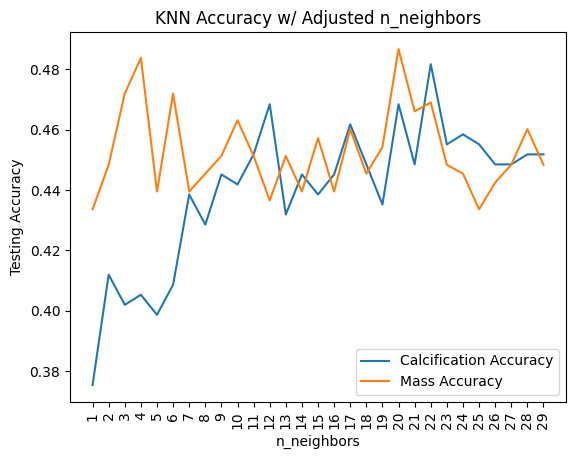

In [ ]:
neighbors_values = [x for x in range(1, 30)] 
calc_accuracies = []
mass_accuracies = []

for x in neighbors_values:

    calc_knn = KNeighborsClassifier(n_neighbors = x)
    calc_knn.fit(calc_train_data, calc_train_targets)

    calc_y_pred = calc_knn.predict(calc_test_data)
    calc_accuracies.append(accuracy_score(calc_y_pred, calc_test_targets))


    mass_knn = KNeighborsClassifier(n_neighbors = x)
    mass_knn.fit(mass_train_data, mass_train_targets)   

    mass_y_pred = mass_knn.predict(mass_test_data)
    mass_accuracies.append(accuracy_score(mass_y_pred, mass_test_targets))

plt.plot(neighbors_values, calc_accuracies)
plt.plot(neighbors_values, mass_accuracies)
plt.legend(["Calcification Accuracy", "Mass Accuracy"])
plt.xlabel("n_neighbors")
plt.ylabel("Testing Accuracy")
plt.title("KNN Accuracy w/ Adjusted n_neighbors")
plt.xticks(neighbors_values, rotation = 90)
plt.show()

In [131]:
top_calc_accuracies = sorted(zip(calc_accuracies, neighbors_values), reverse = True)
opt_nneighbors_calc = top_calc_accuracies[0][1]
print(f"Optimal n_neighbors for Calcification Model: {opt_nneighbors_calc}")

top_mass_accuracies = sorted(zip(mass_accuracies, neighbors_values), reverse = True)
opt_nneighbors_mass = top_mass_accuracies[0][1]
print(f"Optimal n_neighbors for Mass Model: {opt_nneighbors_mass}")

Optimal n_neighbors for Calcification Model: 22
Optimal n_neighbors for Mass Model: 20


In [132]:
calc_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_calc)
calc_knn.fit(calc_train_data, calc_train_targets)

mass_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_mass)
mass_knn.fit(mass_train_data, mass_train_targets)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
calc_y_pred = calc_knn.predict(calc_test_data)
calc_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

mass_y_pred = mass_knn.predict(mass_test_data)
mass_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

<b><font size = 3>Multiclass Results:</b></font>

In [144]:
print(f"Calcification KNN Model Accuracy: {accuracy_score(calc_y_pred, calc_test_targets)} \n")
print(classification_report(calc_y_pred, calc_test_targets))

Calcification KNN Model Accuracy: 0.45182724252491696 

                         precision    recall  f1-score   support

                 BENIGN       0.43      0.44      0.43       113
BENIGN_WITHOUT_CALLBACK       0.72      0.41      0.52       117
              MALIGNANT       0.32      0.54      0.40        71

               accuracy                           0.45       301
              macro avg       0.49      0.46      0.45       301
           weighted avg       0.52      0.45      0.46       301



In [ ]:
labels = calc_knn.classes_
labels[1] = "BWC"

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Calcification Confusion Matrix (KNN)")
plt.show()

In [148]:
print(f"Mass KNN Model Accuracy: {accuracy_score(mass_y_pred, mass_test_targets)} \n")
print(classification_report(mass_y_pred, mass_test_targets, zero_division = 0))

Mass KNN Model Accuracy: 0.44837758112094395 

                         precision    recall  f1-score   support

                 BENIGN       0.44      0.49      0.47       148
BENIGN_WITHOUT_CALLBACK       0.00      0.00      0.00         0
              MALIGNANT       0.58      0.41      0.48       191

               accuracy                           0.45       339
              macro avg       0.34      0.30      0.32       339
           weighted avg       0.52      0.45      0.48       339



In [ ]:
labels = mass_knn.classes_
labels[1] = "BWC"

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Mass Confusion Matrix (KNN)")
plt.show()

<b><font size = 5>Binary KNN (BENIGN, MALIGNANT)</font></b>

In [ ]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\cropped_dataset\mass"

DIM = 224
def load_and_extract_features(directory, DIM):

    X = []
    y = []
    
    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM)) #og: (224, 224)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            X.append(img_gray.flatten())
            y.append(label)

    return X, y

In [ ]:
calc_train_data, calc_train_targets = load_and_extract_features(calc_path + r"\train", DIM)
calc_test_data, calc_test_targets = load_and_extract_features(calc_path + r"\test", DIM)

mass_train_data, mass_train_targets = load_and_extract_features(mass_path + r"\train", DIM)
mass_test_data, mass_test_targets = load_and_extract_features(mass_path + r"\test", DIM)

<b><font size = 3>Testing for Optimal n_neighbors:</font></b>

In [ ]:
neighbors_values = [x for x in range(1, 30)] 
calc_accuracies = []
mass_accuracies = []

for x in neighbors_values:

    calc_knn = KNeighborsClassifier(n_neighbors = x)
    calc_knn.fit(calc_train_data, calc_train_targets)

    calc_y_pred = calc_knn.predict(calc_test_data)
    calc_accuracies.append(accuracy_score(calc_y_pred, calc_test_targets))

    mass_knn = KNeighborsClassifier(n_neighbors = x)
    mass_knn.fit(mass_train_data, mass_train_targets)   

    mass_y_pred = mass_knn.predict(mass_test_data)
    mass_accuracies.append(accuracy_score(mass_y_pred, mass_test_targets))

plt.plot(neighbors_values, calc_accuracies)
plt.plot(neighbors_values, mass_accuracies)
plt.legend(["Calcification Accuracy", "Mass Accuracy"])
plt.xlabel("n_neighbors")
plt.ylabel("Testing Accuracy")
plt.title("KNN Accuracy w/ Adjusted n_neighbors")
plt.xticks(neighbors_values, rotation = 90)
plt.show()

In [ ]:
top_calc_accuracies = sorted(zip(calc_accuracies, neighbors_values), reverse = True)
opt_nneighbors_calc = top_calc_accuracies[0][1]
print(f"Optimal n_neighbors for Calcification Model: {opt_nneighbors_calc}")

top_mass_accuracies = sorted(zip(mass_accuracies, neighbors_values), reverse = True)
opt_nneighbors_mass = top_mass_accuracies[0][1]
print(f"Optimal n_neighbors for Mass Model: {opt_nneighbors_mass}")

In [ ]:
calc_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_calc)
calc_knn.fit(calc_train_data, calc_train_targets)

mass_knn = KNeighborsClassifier(n_neighbors = opt_nneighbors_mass)
mass_knn.fit(mass_train_data, mass_train_targets)

In [ ]:
calc_y_pred = calc_knn.predict(calc_test_data)
calc_confusion = confusion_matrix(calc_y_pred, calc_test_targets)

mass_y_pred = mass_knn.predict(mass_test_data)
mass_confusion = confusion_matrix(mass_y_pred, mass_test_targets)

<b><font size = 3>Binary Results:</b></font>

In [ ]:
print(f"Calcification KNN Model Accuracy: {accuracy_score(calc_y_pred, calc_test_targets)} \n")
print(classification_report(calc_y_pred, calc_test_targets))

In [ ]:
labels = calc_knn.classes_

sns.heatmap(calc_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Calcification Confusion Matrix (KNN)")
plt.show()

In [ ]:
print(f"Mass KNN Model Accuracy: {accuracy_score(mass_y_pred, mass_test_targets)} \n")
print(classification_report(mass_y_pred, mass_test_targets, zero_division = 0))

In [ ]:
labels = mass_knn.classes_

sns.heatmap(mass_confusion, annot = True, xticklabels= labels, yticklabels = labels, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Mass Confusion Matrix (KNN)")
plt.show()